## Importing Necessary Libraries and Packages

# Training Phase

In [25]:
from modules.config import ROOT_DIR
import modules.util as ut
import modules.face_recognition as fr
import matplotlib.pyplot as plt
import numpy as np
import os

## Read Image from Training Sets Folder

In [26]:
dirname = os.path.join(ROOT_DIR, "sample")
training_set = ut.image_to_matrix(dirname)

## Display Example Image Read from File

Text(0.5, 1.0, 'Example Image')

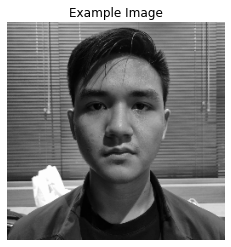

In [27]:
ut.show_image_plt(training_set[:, 0].reshape(256, 256))
plt.title("Example Image")

## the Average Face

Text(0.5, 1.0, 'Average Face')

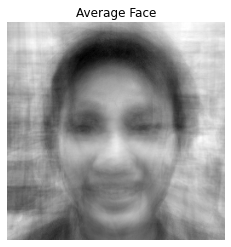

In [28]:
avg = fr.average_face(training_set)
ut.show_image_plt(avg)
plt.title("Average Face")

## Calculate the Eigenfaces

Text(0.5, 1.0, 'Eigenface #1')

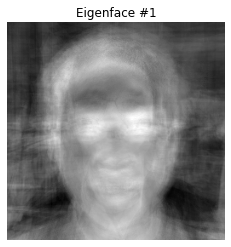

In [29]:
e_train = fr.eigenface(training_set, len(training_set[0]))
ut.show_image_plt(e_train[:, 0].reshape(256, 256))
plt.title("Eigenface #1")

## Calculate Weight of Each Image

Text(0.5, 1.0, 'Training Image Reconstruction')

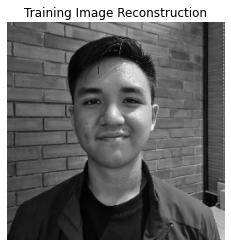

In [66]:
dev = fr.deviation(training_set)
weight = e_train.T @ dev
reconTrain = avg + (e_train @ weight)

ut.show_image_plt(reconTrain[:, 2])
plt.title("Training Image Reconstruction")

# Test Phase

## Read a Test Image

In [85]:
test_dir = os.path.join(ROOT_DIR, "test_sets")
test_sets = ut.image_to_matrix(test_dir)
test_img = test_sets[:, 4].reshape(len(test_sets[:, 1]), 1)

## Original Image

Text(0.5, 1.0, 'Original image')

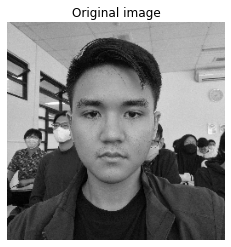

In [86]:
ut.show_image_plt(test_img)
plt.title("Original image")

## Reconstruct Image from Training Set Eigenfaces

Text(0.5, 1.0, 'Test Image Reconstruction')

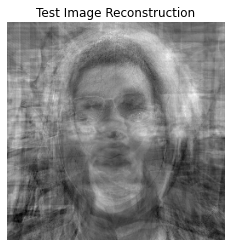

In [87]:
diff = test_img - avg

test_weight = e_train.T @ diff
reconFace = e_train @ test_weight

ut.show_image_plt(reconFace)
plt.title("Test Image Reconstruction")

## Identify with Euclidean Distance of Test Weight and Training Weight

Euclidian distance: 55.23718842950682


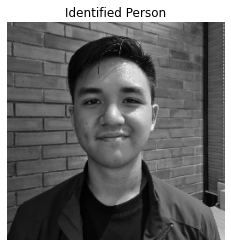

In [88]:
d = np.array([fr.euc_distance(test_weight[:, 0], weight[:, i]) for i in range(len(weight[0]))])

if np.amin(d) < 0.75*np.amax(d):
    idx = np.where(d == np.amin(d))
    identified = training_set[:, idx]
    ut.show_image_plt(identified)
    plt.title("Identified Person")
else:
    print("Cannot be identified!")

print("Euclidian distance:", np.amin(d))